<a href="https://colab.research.google.com/github/Garima0186/Data-Science-Methodologies/blob/main/Implementing__linear_regression_from_scratch_in_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Linear Regression**

Importing the dependencies

In [1]:
import numpy as np

In [2]:
class Linear_Regression:

# initiate the paramenters (learning_rate, no_of_iterations)

  def __init__(self,learning_rate, no_of_iterations):

        self.learning_rate = learning_rate
        self.no_of_iterations = no_of_iterations

# fit the data to our model
  def fit(self,x, y):

  # number of training examples & no. of features

    self.m, self.n = x.shape        # no. of rows and columns, m is no. of trainig set , n is no of features

  # initiating the weight and bias of our model

    self.w = np.zeros(self.n)
    self.b = 0
    self.x = x
    self.y = y

 # implementing gradient descent

    for i in range(self.no_of_iterations):
      self.update_weights()


# update the weights based on gradient descent
  def update_weights(self):

    y_prediction = self.predict(self.x)

    # calculate the gradients

    dw = -(2* (self.x.T).dot(self.y - y_prediction)) / self.m

    db = -2 * np.sum(self.y - y_prediction)  / self.m

    # update the weights

    self.w = self.w - self.learning_rate * dw
    self.b = self.b - self.learning_rate * db


# predict the salary of a person
  def predict(self,x):

    return x.dot(self.w)+self.b

Using Linear Regression Model for prediction

In [3]:
# importing the dependencies

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split


data Preprocessing

In [4]:
# loading the data from csv file to pandas dataframe

salary_data = pd.read_csv("/content/salary_data.csv")

In [5]:
# printing the first five columns of the dataframe

salary_data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [7]:
# print the last five rows of data
salary_data.tail()

,YearsExperience,Salary
25,9.0,105582
26,9.5,116969
27,9.6,112635
28,10.3,122391
29,10.5,121872


In [6]:
#check the no of rows and columns
salary_data.shape


(30, 2)

In [8]:
# checking the missing value

salary_data.isnull().sum()

,0
YearsExperience,0
Salary,0


**Splitting the feature and target**

In [9]:
x= salary_data.drop(columns='Salary', axis = 1)
y= salary_data['Salary']

In [10]:
print(x)

    YearsExperience
0               1.1
1               1.3
2               1.5
3               2.0
4               2.2
5               2.9
6               3.0
7               3.2
8               3.2
9               3.7
10              3.9
11              4.0
12              4.0
13              4.1
14              4.5
15              4.9
16              5.1
17              5.3
18              5.9
19              6.0
20              6.8
21              7.1
22              7.9
23              8.2
24              8.7
25              9.0
26              9.5
27              9.6
28             10.3
29             10.5


In [11]:
print(y)

0      39343
1      46205
2      37731
3      43525
4      39891
5      56642
6      60150
7      54445
8      64445
9      57189
10     63218
11     55794
12     56957
13     57081
14     61111
15     67938
16     66029
17     83088
18     81363
19     93940
20     91738
21     98273
22    101302
23    113812
24    109431
25    105582
26    116969
27    112635
28    122391
29    121872
Name: Salary, dtype: int64


**Splitting the dataset into training and testing data**

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.33, random_state = 2)

In [13]:
x_train.shape

(20, 1)

In [14]:
x_test.shape

(10, 1)

**Training the Linear Regression model**

In [15]:
model = Linear_Regression(learning_rate = 0.02, no_of_iterations = 1000)


In [16]:
model.fit(x_train,y_train)

In [17]:
# printing the parameter  values(weights and bias)

print('weight= ', model.w[0])
print('bias =', model.b)

weight=  9514.400999035135
bias = 23697.406507136307


/tmp/ipython-input-17-2918881014.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('weight= ', model.w[0])


**Predict the salary value for test data**

In [18]:
test_data_prediction = model.predict(x_test)

In [19]:
print(test_data_prediction)

1      36066.127806
0      34163.247606
14     66512.211003
9      58900.690204
21     91249.653600
19     80783.812501
23    101715.494699
6      52240.609504
3      42726.208505
20     88395.333301
dtype: float64


**Visualizing the predicted values & actual Values**

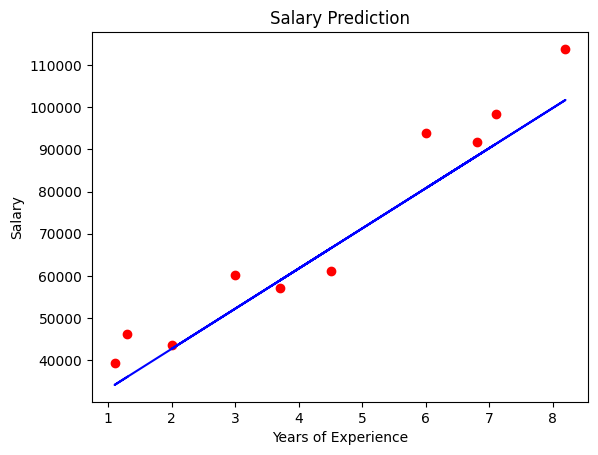

In [23]:
plt.scatter(x_test, y_test, color = 'red')
plt.plot(x_test,test_data_prediction, color = 'blue')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary Prediction')
plt.show()